<a href="https://colab.research.google.com/github/vamshika-codes/jubilant-giggle/blob/main/dogandcattest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git


Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25033, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 25033 (delta 0), reused 4 (delta 0), pack-reused 25027 (from 1)
Receiving objects: 100% (25033/25033), 541.85 MiB | 34.96 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (24990/24990), done.


In [11]:
import os

# List folders inside the dataset
base_path = 'dog-cat-full-dataset/data/train'
print("Cats:", len(os.listdir(os.path.join(base_path, 'cats'))))
print("Dogs:", len(os.listdir(os.path.join(base_path, 'dogs'))))

Cats: 10000
Dogs: 9989


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [17]:
train_dir = 'dog-cat-full-dataset/data/train'
test_dir = 'dog-cat-full-dataset/data/test'

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_dir,
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')


Found 19989 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.fit(train_set,
          steps_per_epoch=625,  # Adjust depending on your data size
          epochs=10,
          validation_data=test_set,
          validation_steps=25)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.7368 - loss: 0.5319 - val_accuracy: 0.7937 - val_loss: 0.4522
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 231ms/step - accuracy: 0.7684 - loss: 0.4888 - val_accuracy: 0.7638 - val_loss: 0.4732
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 323ms/step - accuracy: 0.7794 - loss: 0.4621 - val_accuracy: 0.8125 - val_loss: 0.4107
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 323ms/step - accuracy: 0.7954 - loss: 0.4453 - val_accuracy: 0.7887 - val_loss: 0.4347
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 236ms/step - accuracy: 0.8051 - loss: 0.4273 - val_accuracy: 0.8075 - val_loss: 0.3941
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 323ms/step - accuracy: 0.8098 - loss: 0.4151 - val_accuracy: 0.8188 - val_loss: 0.3976
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 323ms/step - accuracy: 0.8208 - loss: 0.4014 - val_accuracy: 0.8200 - val_loss: 0.3818
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8266 -

In [22]:
loss, accuracy = model.evaluate(test_set, steps=len(test_set))

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step - accuracy: 0.8324 - loss: 0.3801
Test Loss: 0.37785065174102783
Test Accuracy: 0.8349999785423279


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


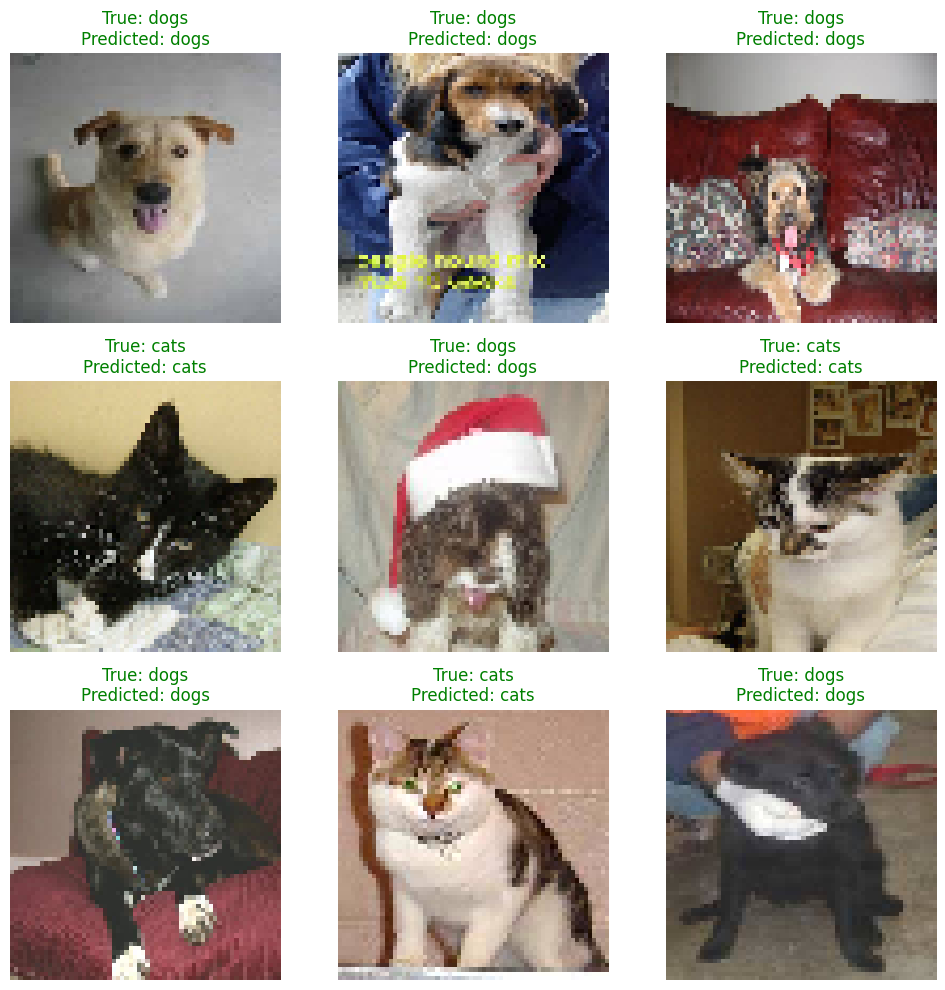

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the test set
test_images, test_labels = next(test_set)

# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels (0 for cat, 1 for dog based on how flow_from_directory assigns labels)
predicted_classes = (predictions > 0.5).astype(int)

# Get the class names
class_names = list(test_set.class_indices.keys())
label_map = {v: k for k, v in test_set.class_indices.items()}


# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(9): # Display the first 9 images in the batch
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = label_map[int(test_labels[i])]
    predicted_label = class_names[predicted_classes[i][0]]
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()